# Comments on EDA

# Load Libraries

In [1]:
import os
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')




# Load Train Data

In [2]:
df = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')
TARGETS = df.columns[-6:]
print('df shape:', df.shape )
print('Targets', list(TARGETS))
df = df.sort_values(by=['patient_id', 'eeg_id', 'eeg_sub_id'])
df

df shape: (106800, 15)
Targets ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
74839,48274288,0,0.0,1496078390,2,664.0,4285360798,56,Other,0,0,0,0,0,1
49045,165634434,0,0.0,957002006,0,0.0,747948121,56,Other,0,0,0,0,0,1
49046,165634434,1,32.0,957002006,1,32.0,15723054,56,Other,0,0,0,0,0,1
35008,201627859,0,0.0,688709208,0,0.0,2561769904,56,Other,0,0,0,0,0,1
25277,234570256,0,0.0,497667405,1,110.0,4289416275,56,Other,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21319,3758950107,7,56.0,415170325,7,56.0,3374743647,65494,Seizure,3,0,0,0,0,0
21320,3758950107,8,66.0,415170325,8,66.0,1433738379,65494,Seizure,3,0,0,0,0,0
21321,3758950107,9,74.0,415170325,9,74.0,3821890915,65494,Seizure,3,0,0,0,0,0
21322,3758950107,10,80.0,415170325,10,80.0,1131243674,65494,Seizure,3,0,0,0,0,0


# Create Row Accuracy



In [3]:
# Adding a new column 'total_evaluators' that sums up the six specified columns
df['total_evaluators'] = df[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].sum(axis=1)

df.sample(25)  # Display the DataFrame with the new column

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_evaluators
32617,2056876876,5,24.0,633553506,5,24.0,388766487,44215,Seizure,3,0,0,0,0,0,3
38945,2892489522,9,58.0,764146759,41,862.0,673394395,30631,LPD,0,4,0,1,0,0,5
31425,212125549,0,0.0,610718961,1,144.0,2097604258,21996,GPD,0,1,4,0,0,0,5
61969,1019419868,12,166.0,1254544437,51,774.0,1335324326,36297,Other,2,0,0,0,2,9,13
106334,2024173188,1,24.0,2136113568,1,24.0,2005612039,51025,Seizure,3,0,0,1,0,1,5
70155,1936448613,8,26.0,1399281636,8,26.0,3148121411,12251,LPD,0,15,0,0,0,0,15
32896,994623797,8,46.0,639042604,8,46.0,3467358879,47660,Seizure,3,0,0,0,0,0,3
49435,3727271877,2,8.0,964912950,2,8.0,977453712,4882,Seizure,3,0,0,0,0,0,3
49739,3668565866,57,306.0,971182963,57,306.0,2549251047,16984,Seizure,3,0,0,0,0,0,3
34516,3129396972,1,2.0,682917955,1,2.0,2515399886,58475,GRDA,0,2,0,0,6,3,11


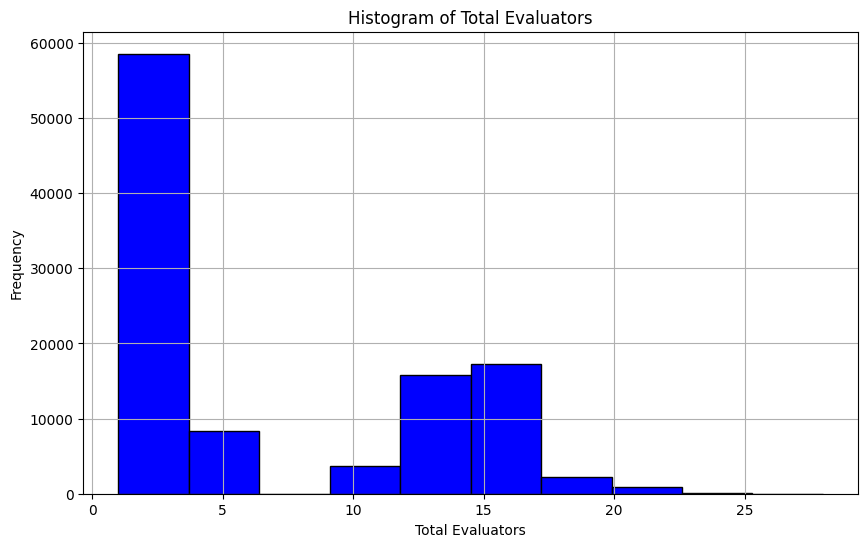

In [4]:
import matplotlib.pyplot as plt

# Plotting a histogram for the 'total_evaluators' column in the 'df' DataFrame

plt.figure(figsize=(10, 6))
plt.hist(df['total_evaluators'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Total Evaluators')
plt.xlabel('Total Evaluators')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- 확연히 차이가 나는 2개의 분포
- 2개의 연구가 합쳐진 결과임을 알 수 있음
- evaluator들이 많을 수록 High quality 데이터라고 설정할 수 있음

In [5]:
# Modifying the previous code to add an additional column 'consensus_column' to 'df'

# Finding the column with the largest number for each row and storing the value in 'consensus'
df['consensus'] = df[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].max(axis=1)

# Identifying the column name that corresponds to the max value for each row
df['consensus_column'] = df[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].idxmax(axis=1)

df.head()  # Display the DataFrame with the new columns



df.sample(25)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_evaluators,consensus,consensus_column
96541,3358839663,12,52.0,1956860148,12,52.0,1626552871,27121,GRDA,0,0,0,0,3,0,3,3,grda_vote
53091,3061472930,1,8.0,1049084276,1,8.0,943983243,36534,LPD,0,2,0,0,1,0,3,2,lpd_vote
92626,4096771384,32,130.0,1877608673,32,130.0,1478694607,63749,GPD,0,0,13,0,0,0,13,13,gpd_vote
60922,1029773755,4,86.0,1232451972,4,86.0,1554310239,31553,Other,0,4,1,2,0,5,12,5,other_vote
67161,1722615148,8,26.0,1344747146,8,26.0,3563473790,63645,Other,0,2,0,4,1,8,15,8,other_vote
89412,3657214276,0,0.0,1834251506,49,370.0,536256582,30631,LPD,0,7,0,4,0,0,11,7,lpd_vote
58395,262635085,11,26.0,1172298217,11,26.0,3177937762,7356,LRDA,0,0,0,3,0,0,3,3,lrda_vote
106277,2531946460,0,0.0,2134804499,0,0.0,2053134734,19472,Seizure,3,0,0,0,0,0,3,3,seizure_vote
72702,3775032546,16,46.0,1455661633,54,938.0,2365141880,38549,GPD,0,2,7,0,1,3,13,7,gpd_vote
17961,4002416194,20,52.0,356263255,20,52.0,3687887796,34041,LRDA,0,0,0,3,0,0,3,3,lrda_vote


In [6]:
# create a new column that shows the percentage agreement
df['row_agreement'] = df['consensus']/df['total_evaluators']
df.sample(25)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_evaluators,consensus,consensus_column,row_agreement
12281,4058771663,118,616.0,236028112,118,616.0,1654231173,15506,GRDA,0,0,0,0,3,0,3,3,grda_vote,1.000000
99561,2097131780,38,182.0,1993693261,38,182.0,3916334912,2973,GRDA,0,0,1,0,5,5,11,5,grda_vote,0.454545
18101,1554332384,2,10.0,360065420,16,302.0,102970653,15950,GRDA,0,0,0,1,2,1,4,2,grda_vote,0.500000
102403,816297342,1,4.0,2050648096,9,114.0,504496731,27908,Seizure,3,1,1,0,0,0,5,3,seizure_vote,0.600000
46491,3401159723,14,42.0,899620124,14,42.0,3623194725,61373,LRDA,0,0,0,2,1,0,3,2,lrda_vote,0.666667
56664,4157002085,5,18.0,1136072664,5,18.0,3424247730,38015,LPD,0,11,0,0,0,1,12,11,lpd_vote,0.916667
37545,3698252652,40,186.0,741558530,40,186.0,306948625,5545,GRDA,0,0,0,0,3,0,3,3,grda_vote,1.000000
78044,188361788,350,2304.0,1568768668,375,2734.0,387527109,28330,LPD,1,2,0,0,0,0,3,2,lpd_vote,0.666667
39511,1225418742,6,94.0,764146759,607,11530.0,3335186278,30631,LRDA,0,4,0,6,0,3,13,6,lrda_vote,0.461538
11751,1613277780,0,0.0,227920933,0,0.0,3610449874,19399,Other,0,0,0,0,0,2,2,2,other_vote,1.000000


In [7]:
df.to_csv('row_agreement.csv', index = False)

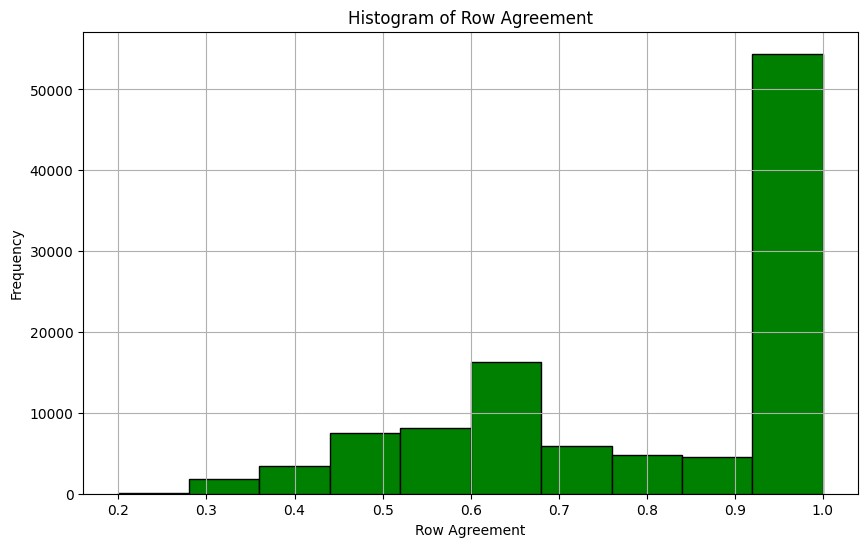

In [8]:
# Plotting a histogram for the 'row_agreement' column

import numpy as np


# Now, plotting the histogram for 'row_agreement'
plt.figure(figsize=(10, 6))
plt.hist(df['row_agreement'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Row Agreement')
plt.xlabel('Row Agreement')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- 대다수의 만장일치 보인 행들은 evaluator가 적었음
- 2개의 연구가 합쳐진 결과

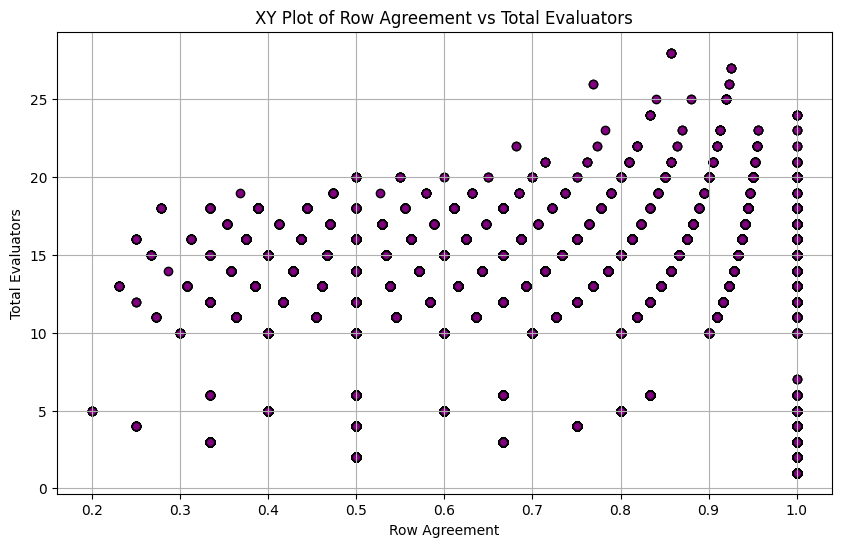

In [9]:
# Plotting an XY plot for 'row_agreement' vs 'total_evaluators'

plt.figure(figsize=(10, 6))
plt.scatter(df['row_agreement'], df['total_evaluators'], color='purple', edgecolor='black')
plt.title('XY Plot of Row Agreement vs Total Evaluators')
plt.xlabel('Row Agreement')
plt.ylabel('Total Evaluators')
plt.grid(True)
plt.show()



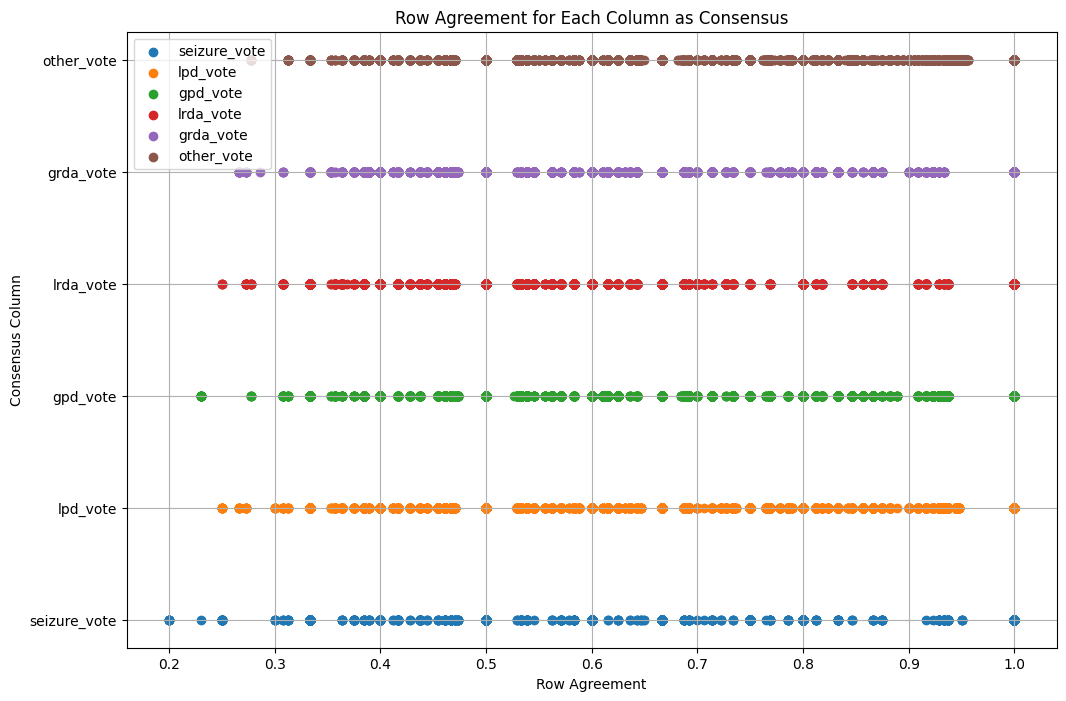

In [10]:
# Assuming 'df' has a mechanism to identify which of the 6 columns ('seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote') is the consensus for each row
# We will generate a plot that shows 'row_agreement' values when each of these columns is the consensus vote

# For demonstration, let's assume 'consensus_column' is a column that indicates which of the 6 columns is the consensus
# This step is for demonstration purposes and should be replaced with your actual method of determining the consensus column
df['consensus_column'] = df[['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].idxmax(axis=1)

# Now, let's plot 'row_agreement' for each of the 6 columns when they are the consensus
plt.figure(figsize=(12, 8))

for column in ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']:
    # Filter the DataFrame for rows where this column is the consensus
    filtered_df = df[df['consensus_column'] == column]
    # Plotting
    plt.scatter(filtered_df['row_agreement'], [column] * len(filtered_df), label=column)

plt.title('Row Agreement for Each Column as Consensus')
plt.xlabel('Row Agreement')
plt.yticks(['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'])
plt.ylabel('Consensus Column')
plt.legend()
plt.grid(True)
plt.show()



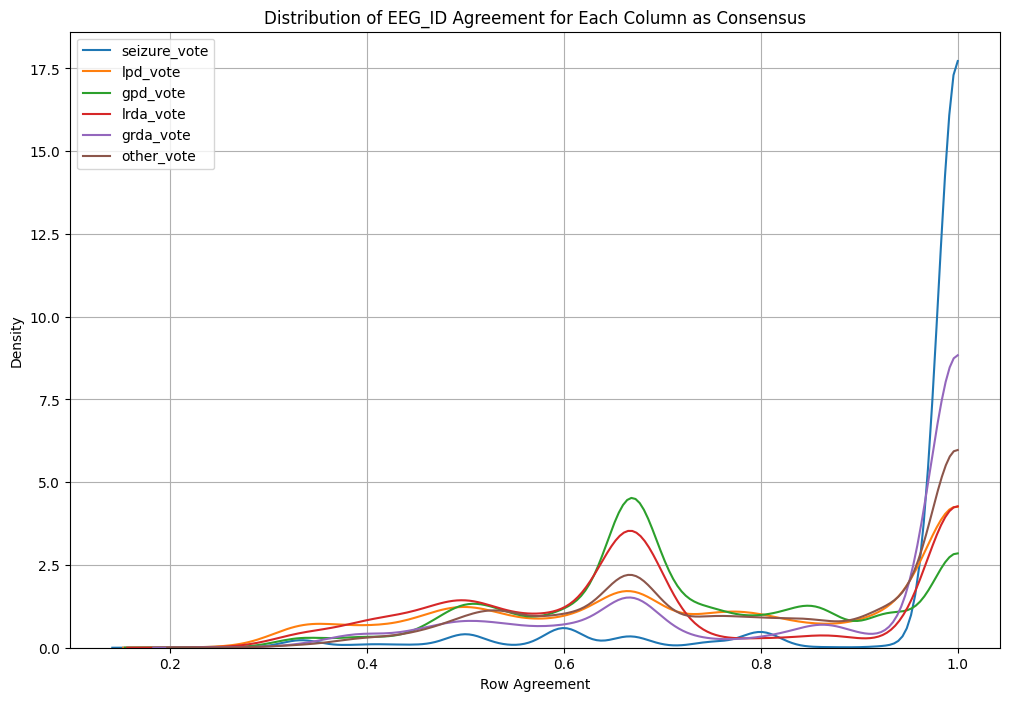

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plotting distribution curves for each column
for column in ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']:
    # Filter the DataFrame for rows where this column is the consensus
    filtered_df = df[df['consensus_column'] == column]

    # Plotting the distribution curve with clipping the x-axis range
    sns.kdeplot(filtered_df['row_agreement'], label=column, clip=(0, 1.0))

plt.title('Distribution of EEG_ID Agreement for Each Column as Consensus')
plt.xlabel('Row Agreement')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



1.  특정 eeg_id들은 동의율이 20퍼 혹은 이하였음
2.  발작 투표율은 대부분 1.0에 근접
3.  GPD 투표율은 1.0 부근에서 가장 낮음
4.  분포를 보면 알다시피 2개의 연구가 합쳐진 결과가 이번 대회의 데이터 인것을 알 수 있음.

#  eeg Agreement

Lets repeat this data analysis by eeg_id.  There are a number of eeg_id that have multiple rows of data.

First lets see the distribution of evaluations per egg_id

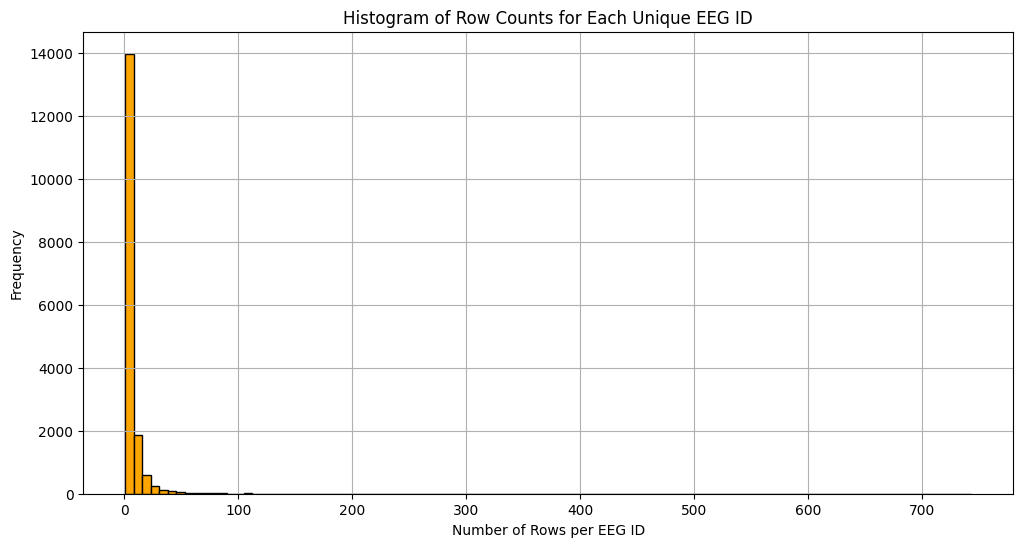

In [12]:
# Assuming 'eeg_id' is a column in the 'df' DataFrame
# We will generate a histogram that shows the count of rows for each unique 'eeg_id'

# Counting the number of rows for each unique 'eeg_id'
# Adding the 'eeg_id_counts' to the DataFrame 'df'
# This will map each 'eeg_id' in 'df' to its count

# First, create a Series with 'eeg_id' as the index and the counts as values
eeg_id_counts = df['eeg_id'].value_counts()

# Mapping each 'eeg_id' in 'df' to its count
df['eeg_id_counts'] = df['eeg_id'].map(eeg_id_counts)




# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(eeg_id_counts, bins=100, color='orange', edgecolor='black')
plt.title('Histogram of Row Counts for Each Unique EEG ID')
plt.xlabel('Number of Rows per EEG ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [13]:
df.head(25)  # Display the first few rows of the DataFrame to show the new column


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_evaluators,consensus,consensus_column,row_agreement,eeg_id_counts
74839,48274288,0,0.0,1496078390,2,664.0,4285360798,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,1
49045,165634434,0,0.0,957002006,0,0.0,747948121,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,2
49046,165634434,1,32.0,957002006,1,32.0,15723054,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,2
35008,201627859,0,0.0,688709208,0,0.0,2561769904,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,1
25277,234570256,0,0.0,497667405,1,110.0,4289416275,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,1
47440,271569269,0,0.0,925581305,0,0.0,841585731,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,1
82318,353521535,0,0.0,1675215061,2,398.0,2259961752,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,1
25278,374550767,0,0.0,497667405,2,694.0,2160633659,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,1
42025,446890674,0,0.0,810462822,0,0.0,3520730739,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,1
16027,487553906,0,0.0,318214697,0,0.0,1384263763,56,Other,0,0,0,0,0,1,1,1,other_vote,1.0,1


In [14]:
row_agreement_agg = df.groupby('eeg_id')['consensus'].agg('sum')

# Mapping this aggregated value back to each row in 'df'
df['row_consensus_agg'] = df['eeg_id'].map(row_agreement_agg)


row_evaluators_agg = df.groupby('eeg_id')['total_evaluators'].agg('sum')

# Mapping this aggregated value back to each row in 'df'
df['row_evaluators_agg'] = df['eeg_id'].map(row_evaluators_agg)

df['eeg_agreement'] = df['row_consensus_agg']/df['row_evaluators_agg']

df.head(25)  # Display the first few rows of the DataFrame to show the new column



,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,...,grda_vote,other_vote,total_evaluators,consensus,consensus_column,row_agreement,eeg_id_counts,row_consensus_agg,row_evaluators_agg,eeg_agreement
74839,48274288,0,0.0,1496078390,2,664.0,4285360798,56,Other,0,...,0,1,1,1,other_vote,1.0,1,1,1,1.0
49045,165634434,0,0.0,957002006,0,0.0,747948121,56,Other,0,...,0,1,1,1,other_vote,1.0,2,2,2,1.0
49046,165634434,1,32.0,957002006,1,32.0,15723054,56,Other,0,...,0,1,1,1,other_vote,1.0,2,2,2,1.0
35008,201627859,0,0.0,688709208,0,0.0,2561769904,56,Other,0,...,0,1,1,1,other_vote,1.0,1,1,1,1.0
25277,234570256,0,0.0,497667405,1,110.0,4289416275,56,Other,0,...,0,1,1,1,other_vote,1.0,1,1,1,1.0
47440,271569269,0,0.0,925581305,0,0.0,841585731,56,Other,0,...,0,1,1,1,other_vote,1.0,1,1,1,1.0
82318,353521535,0,0.0,1675215061,2,398.0,2259961752,56,Other,0,...,0,1,1,1,other_vote,1.0,1,1,1,1.0
25278,374550767,0,0.0,497667405,2,694.0,2160633659,56,Other,0,...,0,1,1,1,other_vote,1.0,1,1,1,1.0
42025,446890674,0,0.0,810462822,0,0.0,3520730739,56,Other,0,...,0,1,1,1,other_vote,1.0,1,1,1,1.0
16027,487553906,0,0.0,318214697,0,0.0,1384263763,56,Other,0,...,0,1,1,1,other_vote,1.0,1,1,1,1.0


In [15]:
df.to_csv('eeg_agreement.csv', index = False)

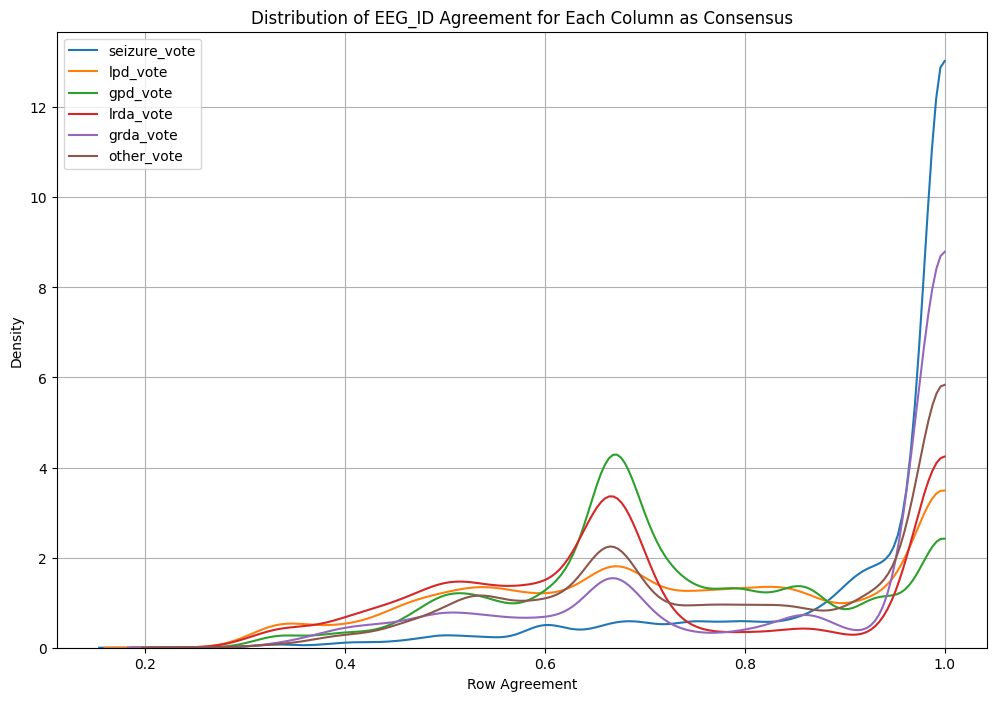

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plotting distribution curves for each column
for column in ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']:
    # Filter the DataFrame for rows where this column is the consensus
    filtered_df = df[df['consensus_column'] == column]

    # Plotting the distribution curve with clipping the x-axis range
    sns.kdeplot(filtered_df['eeg_agreement'], label=column, clip=(0, 1.0))

plt.title('Distribution of EEG_ID Agreement for Each Column as Consensus')
plt.xlabel('Row Agreement')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



- row 와 eeg_id는 비슷한 plot을 보임

Expanding on this theme - lets look at patient_id

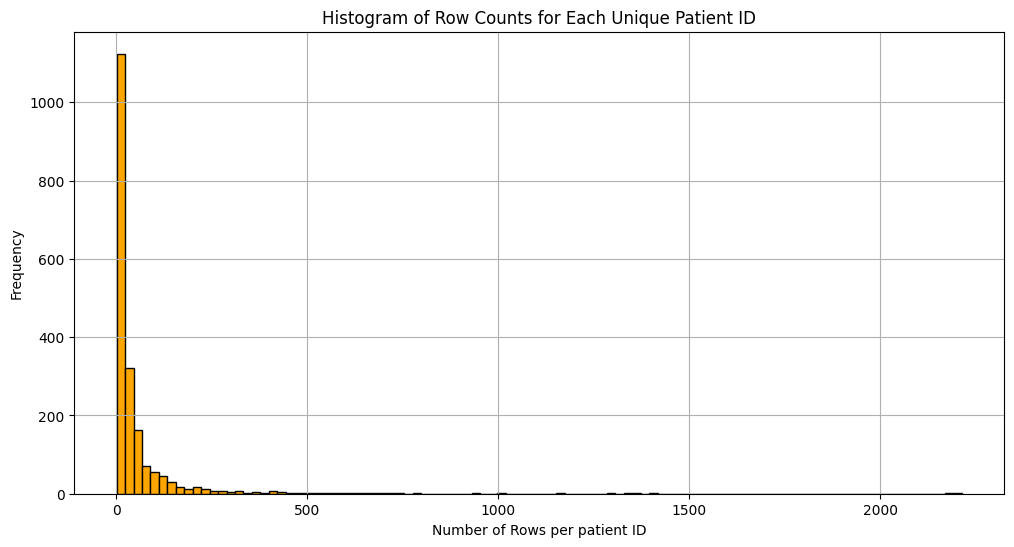

In [17]:
# Assuming 'eeg_id' is a column in the 'df' DataFrame
# We will generate a histogram that shows the count of rows for each unique 'eeg_id'

# Counting the number of rows for each unique 'eeg_id'
# Adding the 'eeg_id_counts' to the DataFrame 'df'
# This will map each 'eeg_id' in 'df' to its count

# First, create a Series with 'eeg_id' as the index and the counts as values
patient_id_counts = df['patient_id'].value_counts()

# Mapping each 'eeg_id' in 'df' to its count
df['patient_id_counts'] = df['patient_id'].map(patient_id_counts)




# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(patient_id_counts, bins=100, color='orange', edgecolor='black')
plt.title('Histogram of Row Counts for Each Unique Patient ID')
plt.xlabel('Number of Rows per patient ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [18]:


row_agreement_agg = df.groupby('patient_id')['consensus'].agg('sum')

# Mapping this aggregated value back to each row in 'df'
df['patient_consensus_agg'] = df['patient_id'].map(row_agreement_agg)


row_evaluators_agg = df.groupby('patient_id')['total_evaluators'].agg('sum')

# Mapping this aggregated value back to each row in 'df'
df['patient_evaluators_agg'] = df['patient_id'].map(row_evaluators_agg)

df['patient_agreement'] = df['patient_consensus_agg']/df['patient_evaluators_agg']

df.sample(25)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,...,consensus_column,row_agreement,eeg_id_counts,row_consensus_agg,row_evaluators_agg,eeg_agreement,patient_id_counts,patient_consensus_agg,patient_evaluators_agg,patient_agreement
72198,1712056492,432,1088.0,1443709916,432,1088.0,2385898396,52100,LRDA,0,...,lrda_vote,0.666667,433,866,1299,0.666667,434,867,1301,0.666410
74587,1002136740,20,72.0,1488564716,78,684.0,734595400,21996,GPD,0,...,gpd_vote,0.750000,52,156,208,0.750000,470,2299,2888,0.796053
89319,2699981091,44,158.0,1833008322,44,158.0,1042078186,20093,GPD,0,...,gpd_vote,0.846154,70,770,910,0.846154,160,1550,2089,0.741982
54381,278404637,7,20.0,1078783551,7,20.0,3427904887,44926,GRDA,0,...,grda_vote,0.500000,10,80,160,0.500000,60,335,499,0.671343
33783,2477266011,1,2.0,666908200,12,872.0,2806619260,50493,Seizure,3,...,seizure_vote,1.000000,10,30,30,1.000000,37,164,231,0.709957
543,839643180,18,116.0,12849827,115,1138.0,3839715363,34998,GPD,0,...,gpd_vote,1.000000,123,536,615,0.871545,618,3065,4559,0.672297
32686,1460856519,12,32.0,634488329,12,32.0,2874391641,726,LRDA,0,...,lrda_vote,1.000000,31,93,93,1.000000,142,396,426,0.929577
46903,122682258,0,0.0,912089765,9,440.0,341277107,1218,LPD,0,...,lpd_vote,1.000000,1,1,1,1.000000,453,3624,4255,0.851704
29335,2904068790,38,200.0,572444744,38,200.0,3955062995,40600,GRDA,0,...,grda_vote,0.666667,106,212,318,0.666667,116,232,348,0.666667
21382,3323744815,7,52.0,416887438,7,52.0,2821837599,30359,Seizure,3,...,seizure_vote,1.000000,36,110,112,0.982143,37,113,117,0.965812


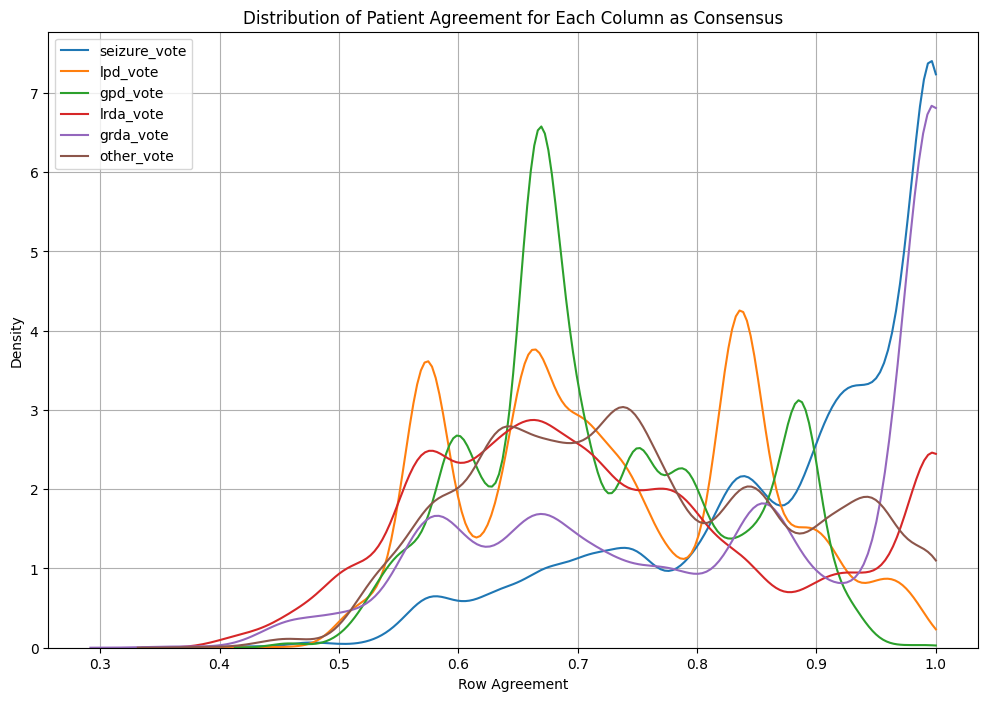

In [19]:
plt.figure(figsize=(12, 8))

# Plotting distribution curves for each column
for column in ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']:
    # Filter the DataFrame for rows where this column is the consensus
    filtered_df = df[df['consensus_column'] == column]

    # Plotting the distribution curve with clipping the x-axis range
    sns.kdeplot(filtered_df['patient_agreement'], label=column, clip=(0, 1.0))

plt.title('Distribution of Patient Agreement for Each Column as Consensus')
plt.xlabel('Row Agreement')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



발작 - patients with this condition have consistent eeg's 이를 지닌 환자들은 일정한 EEG 혹은 evaluator들이 발견하고 동의하기 쉬웠음

GPD - 환자들의 증상은 오래 가진 않았고 evaluator 입장에서 발견하기 어려웠음. 모든 evluator들이 만장일치인 eeg가 없음


In [20]:
df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,...,consensus_column,row_agreement,eeg_id_counts,row_consensus_agg,row_evaluators_agg,eeg_agreement,patient_id_counts,patient_consensus_agg,patient_evaluators_agg,patient_agreement
74839,48274288,0,0.0,1496078390,2,664.0,4285360798,56,Other,0,...,other_vote,1.0,1,1,1,1.0,60,97,99,0.979798
49045,165634434,0,0.0,957002006,0,0.0,747948121,56,Other,0,...,other_vote,1.0,2,2,2,1.0,60,97,99,0.979798
49046,165634434,1,32.0,957002006,1,32.0,15723054,56,Other,0,...,other_vote,1.0,2,2,2,1.0,60,97,99,0.979798
35008,201627859,0,0.0,688709208,0,0.0,2561769904,56,Other,0,...,other_vote,1.0,1,1,1,1.0,60,97,99,0.979798
25277,234570256,0,0.0,497667405,1,110.0,4289416275,56,Other,0,...,other_vote,1.0,1,1,1,1.0,60,97,99,0.979798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21319,3758950107,7,56.0,415170325,7,56.0,3374743647,65494,Seizure,3,...,seizure_vote,1.0,12,36,36,1.0,20,72,73,0.986301
21320,3758950107,8,66.0,415170325,8,66.0,1433738379,65494,Seizure,3,...,seizure_vote,1.0,12,36,36,1.0,20,72,73,0.986301
21321,3758950107,9,74.0,415170325,9,74.0,3821890915,65494,Seizure,3,...,seizure_vote,1.0,12,36,36,1.0,20,72,73,0.986301
21322,3758950107,10,80.0,415170325,10,80.0,1131243674,65494,Seizure,3,...,seizure_vote,1.0,12,36,36,1.0,20,72,73,0.986301


In [21]:
# use this file if you wish to include any of these agreement values in your model.
df.to_csv('train_upgraded.csv', index = False)

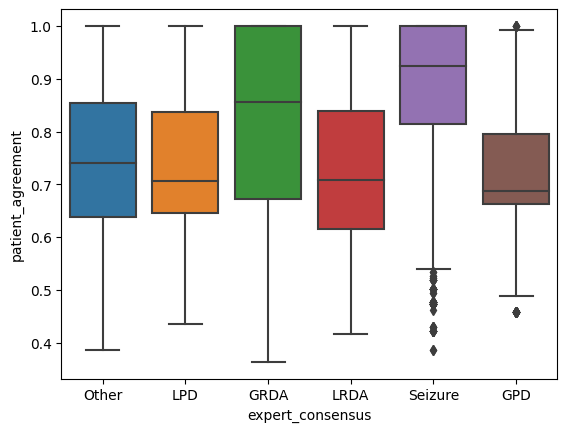

In [22]:
sns.boxplot(x='expert_consensus', y='patient_agreement', data = df)
plt.show()

Another way to look at agreement.

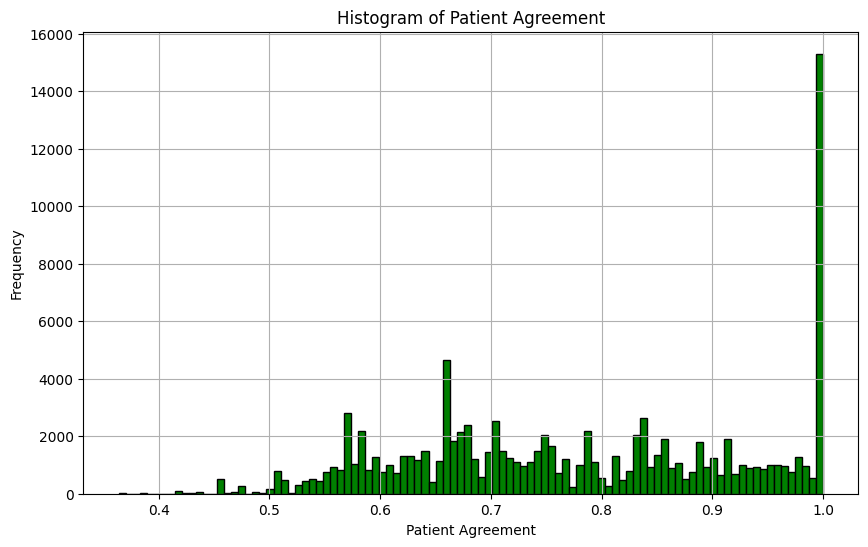

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['patient_agreement'], bins=100, color='green', edgecolor='black')
plt.title('Histogram of Patient Agreement')
plt.xlabel('Patient Agreement')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The overview describes eeg's were the experts agree as "idealized".   If only 3 experts, but they all agree what level of confidence can we have that they are 'ideal'?

If only a single eeg for a patient, but agreement with a large number of experts, what confidence can we have that they are 'ideal'?

From the previous plot we can see that many of the perfect agreement eeg's are 'other' or 'seizure'.  
- 전 플롯에서 보다시피 EEG의 만장일치인 라벨들은 '기타' 혹은 '발작' 


# Evaluator group size impact

- 위 플롯에 의하면 2가지의 연구가 합쳐진 결과가 대회의 데이터

In [24]:
# Create 'large' DataFrame with rows where 'total_evaluators' is greater than 9
large = df[df['total_evaluators'] > 9]

# Create 'small' DataFrame with rows where 'total_evaluators' is less than 10.  actual values are 3 to 6 
small = df[df['total_evaluators'] < 10]


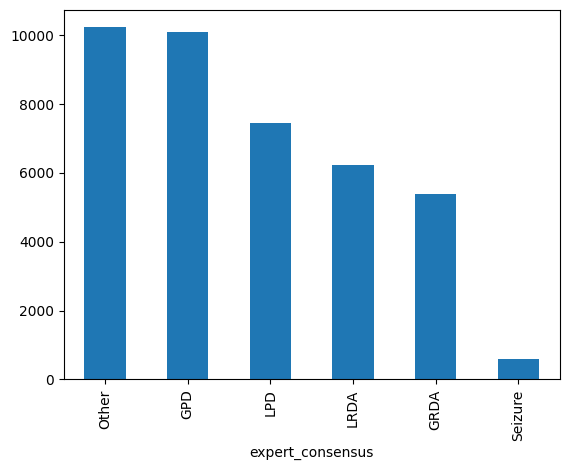

In [25]:
large["expert_consensus"].value_counts().plot(kind='bar');

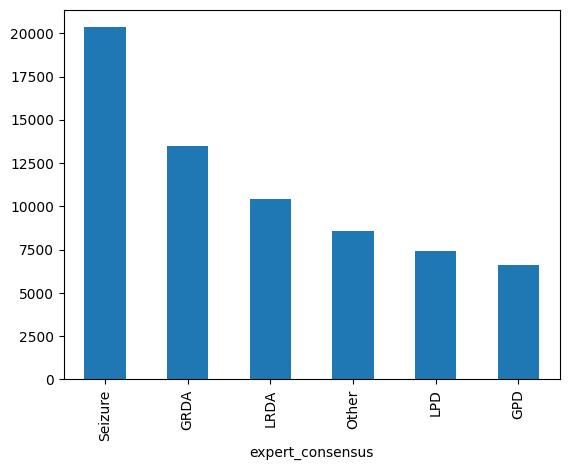

In [26]:
small["expert_consensus"].value_counts().plot(kind='bar');

- 평가자의 수가 6명 이하일 때는 '발작'이 주요 레이블이지만, 평가자의 수가 9명 이상인 그룹에서는 이 레이블이 가장 적게 나타남
- 소수 그룹과 대규모 그룹의 평가자로 나뉨
- 평가자가 많은 그룹에서는 '기타'가 다수 

# Idealized Only

In [27]:
# Creating a new DataFrame with the condition for high agreement only
# 
ideal_df = df[df['patient_agreement'] > 0.90]
ideal_df.to_csv('ideal_train.csv', index = False)
ideal_df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,...,consensus_column,row_agreement,eeg_id_counts,row_consensus_agg,row_evaluators_agg,eeg_agreement,patient_id_counts,patient_consensus_agg,patient_evaluators_agg,patient_agreement
74839,48274288,0,0.0,1496078390,2,664.0,4285360798,56,Other,0,...,other_vote,1.0,1,1,1,1.0,60,97,99,0.979798
49045,165634434,0,0.0,957002006,0,0.0,747948121,56,Other,0,...,other_vote,1.0,2,2,2,1.0,60,97,99,0.979798
49046,165634434,1,32.0,957002006,1,32.0,15723054,56,Other,0,...,other_vote,1.0,2,2,2,1.0,60,97,99,0.979798
35008,201627859,0,0.0,688709208,0,0.0,2561769904,56,Other,0,...,other_vote,1.0,1,1,1,1.0,60,97,99,0.979798
25277,234570256,0,0.0,497667405,1,110.0,4289416275,56,Other,0,...,other_vote,1.0,1,1,1,1.0,60,97,99,0.979798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21319,3758950107,7,56.0,415170325,7,56.0,3374743647,65494,Seizure,3,...,seizure_vote,1.0,12,36,36,1.0,20,72,73,0.986301
21320,3758950107,8,66.0,415170325,8,66.0,1433738379,65494,Seizure,3,...,seizure_vote,1.0,12,36,36,1.0,20,72,73,0.986301
21321,3758950107,9,74.0,415170325,9,74.0,3821890915,65494,Seizure,3,...,seizure_vote,1.0,12,36,36,1.0,20,72,73,0.986301
21322,3758950107,10,80.0,415170325,10,80.0,1131243674,65494,Seizure,3,...,seizure_vote,1.0,12,36,36,1.0,20,72,73,0.986301


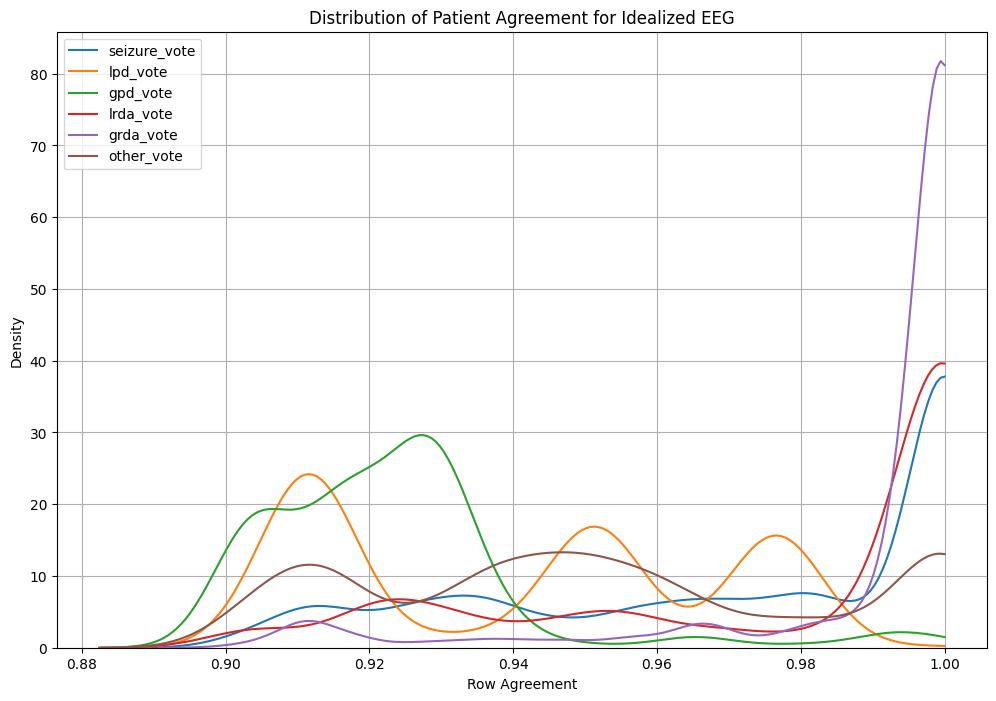

In [28]:
plt.figure(figsize=(12, 8))

# Plotting distribution curves for each column
for column in ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']:
    # Filter the DataFrame for rows where this column is the consensus
    filtered_df = ideal_df[ideal_df['consensus_column'] == column]

    # Plotting the distribution curve with clipping the x-axis range
    sns.kdeplot(filtered_df['patient_agreement'], label=column, clip=(0, 1.0))

plt.title('Distribution of Patient Agreement for Idealized EEG')
plt.xlabel('Row Agreement')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# Generalized or Lateral

The eeg for 4 of the labels are evaluated based on the eeg's being Generalized or Lateral.
    Generalized - gpd and grda
    Lateral - lpd and irda
    


In [29]:
df['general_type'] = df['expert_consensus'].astype(str).str[0]
unique_values = df['general_type'].unique()
unique_values

array(['O', 'L', 'G', 'S'], dtype=object)

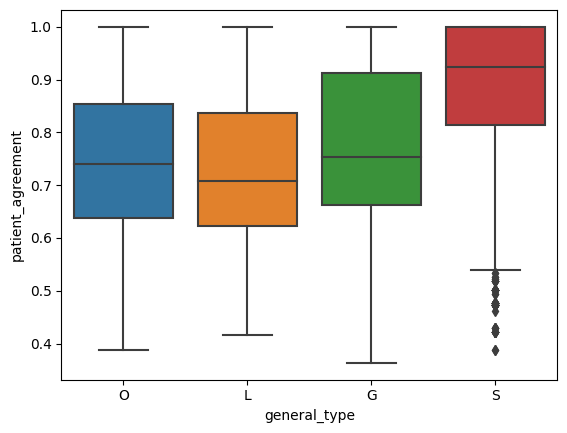

In [30]:
sns.boxplot(x='general_type', y='patient_agreement', data = df)
plt.show()

- '발작' 이 가장 다수. '발작'은 가장 명확한 outlier를 가짐

In [31]:
check_general_lateral = df[df['general_type'].isin(['G', "L"])]
check_general_lateral

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,...,row_agreement,eeg_id_counts,row_consensus_agg,row_evaluators_agg,eeg_agreement,patient_id_counts,patient_consensus_agg,patient_evaluators_agg,patient_agreement,general_type
77558,676375482,0,0.0,1564688399,0,0.0,4024944520,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
77559,676375482,1,2.0,1564688399,1,2.0,2406524404,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
77560,676375482,2,4.0,1564688399,2,4.0,1275774159,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
77561,676375482,3,12.0,1564688399,3,12.0,1761575521,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
77562,676375482,4,14.0,1564688399,4,14.0,2740129146,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89873,2864918309,58,242.0,1836830050,59,812.0,3391730326,65378,GRDA,0,...,0.500000,63,378,756,0.500000,401,1897,2981,0.636364,G
89874,2864918309,59,250.0,1836830050,60,820.0,4291814347,65378,GRDA,0,...,0.500000,63,378,756,0.500000,401,1897,2981,0.636364,G
89875,2864918309,60,254.0,1836830050,61,824.0,2198358151,65378,GRDA,0,...,0.500000,63,378,756,0.500000,401,1897,2981,0.636364,G
89876,2864918309,61,256.0,1836830050,62,826.0,1199197859,65378,GRDA,0,...,0.500000,63,378,756,0.500000,401,1897,2981,0.636364,G


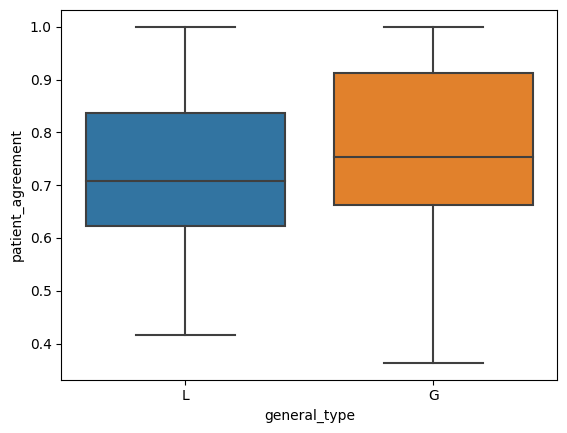

In [32]:
sns.boxplot(x='general_type', y='patient_agreement', data = check_general_lateral)
plt.show()

- 여러 discussion에 의하면 evaluator들은 10 초 데이터 뿐만이 아니라 전체 50초 혹은 10분짜리 데이터를 근거로 결론을 내릴 가능성이 높음

In [33]:
# Create 'large' DataFrame with rows where 'total_evaluators' is greater than 9
large = check_general_lateral[check_general_lateral['total_evaluators'] > 9]

# Create 'small' DataFrame with rows where 'total_evaluators' is less than 10.  actual values are 3 to 6 
small = check_general_lateral[check_general_lateral['total_evaluators'] < 10]

In [34]:
large

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,...,row_agreement,eeg_id_counts,row_consensus_agg,row_evaluators_agg,eeg_agreement,patient_id_counts,patient_consensus_agg,patient_evaluators_agg,patient_agreement,general_type
77558,676375482,0,0.0,1564688399,0,0.0,4024944520,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
77559,676375482,1,2.0,1564688399,1,2.0,2406524404,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
77560,676375482,2,4.0,1564688399,2,4.0,1275774159,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
77561,676375482,3,12.0,1564688399,3,12.0,1761575521,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
77562,676375482,4,14.0,1564688399,4,14.0,2740129146,105,LPD,0,...,0.666667,5,40,60,0.666667,54,431,636,0.677673,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89873,2864918309,58,242.0,1836830050,59,812.0,3391730326,65378,GRDA,0,...,0.500000,63,378,756,0.500000,401,1897,2981,0.636364,G
89874,2864918309,59,250.0,1836830050,60,820.0,4291814347,65378,GRDA,0,...,0.500000,63,378,756,0.500000,401,1897,2981,0.636364,G
89875,2864918309,60,254.0,1836830050,61,824.0,2198358151,65378,GRDA,0,...,0.500000,63,378,756,0.500000,401,1897,2981,0.636364,G
89876,2864918309,61,256.0,1836830050,62,826.0,1199197859,65378,GRDA,0,...,0.500000,63,378,756,0.500000,401,1897,2981,0.636364,G


In [35]:
small

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,...,row_agreement,eeg_id_counts,row_consensus_agg,row_evaluators_agg,eeg_agreement,patient_id_counts,patient_consensus_agg,patient_evaluators_agg,patient_agreement,general_type
45854,3347948514,0,0.0,888540936,0,0.0,3326305960,149,GRDA,0,...,1.0,4,12,12,1.0,9,27,27,1.000000,G
45855,3347948514,1,2.0,888540936,1,2.0,323281261,149,GRDA,0,...,1.0,4,12,12,1.0,9,27,27,1.000000,G
45856,3347948514,2,4.0,888540936,2,4.0,378840243,149,GRDA,0,...,1.0,4,12,12,1.0,9,27,27,1.000000,G
45857,3347948514,3,6.0,888540936,3,6.0,671727979,149,GRDA,0,...,1.0,4,12,12,1.0,9,27,27,1.000000,G
76736,3787970108,0,0.0,1541002016,0,0.0,3481723217,149,GRDA,0,...,1.0,5,15,15,1.0,9,27,27,1.000000,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51949,849967037,1,2.0,1023320297,21,2650.0,2064158456,65378,GPD,0,...,0.5,6,12,24,0.5,401,1897,2981,0.636364,G
51950,849967037,2,4.0,1023320297,22,2652.0,3540042101,65378,GPD,0,...,0.5,6,12,24,0.5,401,1897,2981,0.636364,G
51951,849967037,3,6.0,1023320297,23,2654.0,169595393,65378,GPD,0,...,0.5,6,12,24,0.5,401,1897,2981,0.636364,G
51952,849967037,4,8.0,1023320297,24,2656.0,2494341783,65378,GPD,0,...,0.5,6,12,24,0.5,401,1897,2981,0.636364,G


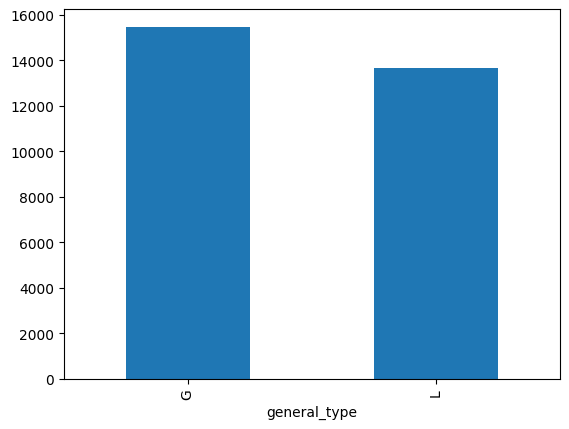

In [36]:
large["general_type"].value_counts().plot(kind='bar');

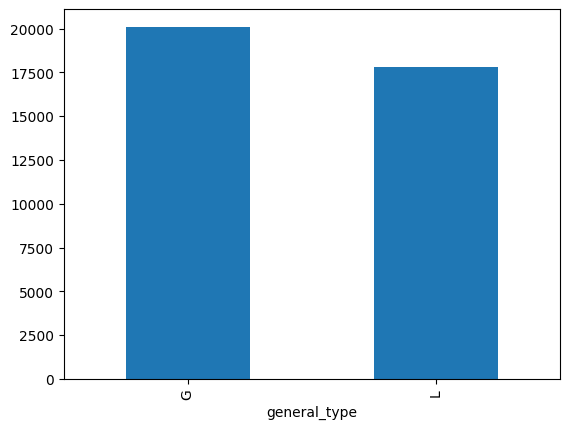

In [37]:
small["general_type"].value_counts().plot(kind='bar');

- 2개의 명백한 evaluator 그룹들이 라벨의 분포에서 차이를 보였으나 Generalized와 Lateral을 구분짓는 차이를 보이진 않음